# Predicting Customer Segmentation
An unsupervised  learning algorithm can be trained on a dataset of customer behavior and demographic information to segment customers into different groups. 

| Criteria | Particular |
| ----------- | ----------- |
| Algorithm | K-Means Clustering |
| Evaluation Parameters | Within-Cluster Sum of Squares<br><br>Silhouette Score<br><br>Calinski-Harabasz Index<br><br> Davies-Bouldin Index |

## 1. Importing Dependencies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [4]:
%%time
df = pd.read_excel("/content/drive/MyDrive/SEM VIII/ADS/Experiment 4/Online Retail.xlsx")

CPU times: user 1min 16s, sys: 301 ms, total: 1min 16s
Wall time: 1min 17s


In [46]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 3. EDA & Data Cleaning

In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.duplicated().sum()

5268

In [9]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

0

In [10]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df1['Description'] = df1['Description'].replace(np.nan, 'NA')

Dropping ALL those rows where the `CustomerID` is null, because the number is huge (135037 - almost 25% of the dataset). This will result in the most accurate clustering.

In [ ]:
df2 = df1.dropna(subset=['CustomerID'])

## 4. Selecting the optimal number of clusters

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Mapping the `Country` column to a unique number for each Country.

In [17]:
df2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [18]:
value_map = {value: index for index, value in enumerate(df2['Country'].unique())}

# Map the values in the 'category' column to numbers
df2['Country'] = df2['Country'].map(value_map)

In [19]:
X = df2[['Quantity', 'UnitPrice', 'CustomerID', 'Country']]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determining the optimal number of clusters using the `within-cluster sum of squares (WCSS)`, `Silhouette Score`, `Calinski-Harabasz Index` and 
`Davies-Bouldin Index`

In [19]:
%%time
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

CPU times: user 31.5 s, sys: 10.8 s, total: 42.4 s
Wall time: 24.8 s


In [20]:
%%time
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

CPU times: user 4h 54min 59s, sys: 1h 32min, total: 6h 27min
Wall time: 5h 16min 29s


In [21]:
%%time
ch_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

CPU times: user 34.1 s, sys: 11.6 s, total: 45.7 s
Wall time: 27.8 s


In [22]:
%%time
db_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

CPU times: user 34.1 s, sys: 12 s, total: 46.2 s
Wall time: 27.4 s


Plot the results

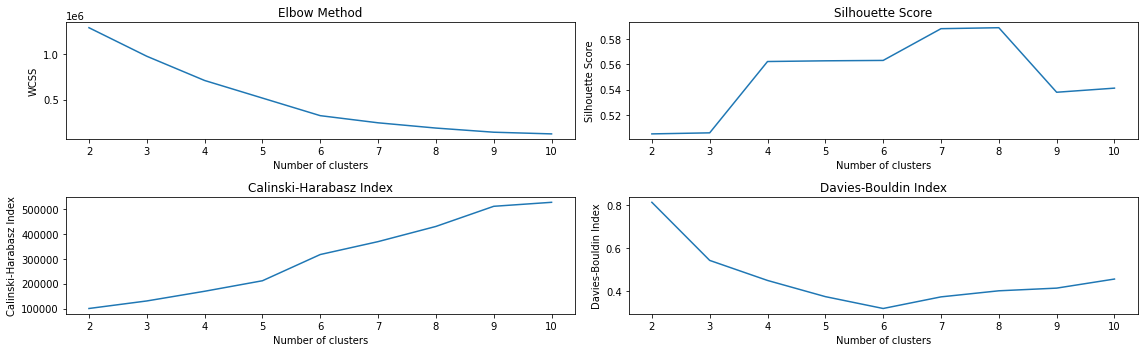

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(16, 5))
ax[0, 0].plot(range(2, 11), wcss)
ax[0, 0].set_title('Elbow Method')
ax[0, 0].set_xlabel('Number of clusters')
ax[0, 0].set_ylabel('WCSS')

ax[0, 1].plot(range(2, 11), silhouette_scores)
ax[0, 1].set_title('Silhouette Score')
ax[0, 1].set_xlabel('Number of clusters')
ax[0, 1].set_ylabel('Silhouette Score')

ax[1, 0].plot(range(2, 11), ch_scores)
ax[1, 0].set_title('Calinski-Harabasz Index')
ax[1, 0].set_xlabel('Number of clusters')
ax[1, 0].set_ylabel('Calinski-Harabasz Index')

ax[1, 1].plot(range(2, 11), db_scores)
ax[1, 1].set_title('Davies-Bouldin Index')
ax[1, 1].set_xlabel('Number of clusters')
ax[1, 1].set_ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

## 4. Optimal Clusters Conclusion : 6

| Parameter | Clusters | Score |
| ----------- | ----------- | ----------- |
| WCSS | 6 | 0.5 |
| Silhouette Score | 6 | 0.56 |
| Calinski-Harabasz Index | 6 | 3,00,000 |
| Davies-Bouldin Index | 6 | 0.38 |


## 5. Implementing Clustering

In [22]:
%%time
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=None)
labels = kmeans.fit_predict(X)

CPU times: user 6.55 s, sys: 1.11 s, total: 7.66 s
Wall time: 4.96 s


## 6. Evaluating the model

In [27]:
%%time
w = kmeans.inertia_
c = calinski_harabasz_score(X, labels)
d = davies_bouldin_score(X, labels)

CPU times: user 130 ms, sys: 41.8 ms, total: 172 ms
Wall time: 129 ms


In [28]:
print(f'WCSS: {w}')
print(f'Silhoutte Score: 0.56')
print(f'Calinski-Harabasz Index: {c}')
print(f'Davies-Bouldin Index: {d}')

WCSS: 57396299545.58153
Silhoutte Score: 0.56
Calinski-Harabasz Index: 1608721.3965428101
Davies-Bouldin Index: 0.49500741104792817


## 7. Plotting the Cluster Scatter Graph

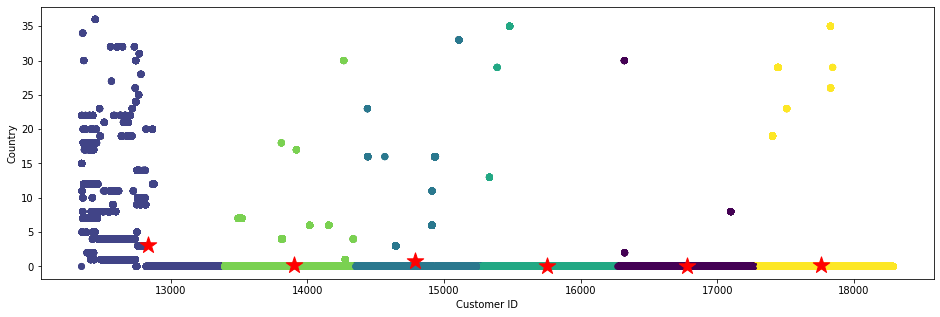

In [42]:
plt.figure(figsize=(16, 5))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='*', s=300, c='r')
plt.xlabel('Customer ID')
plt.ylabel('Country')
plt.show()